# <center>Árboles de Decisión</center>

En este ejercicio, usaremos un algoritmo muy popular de machine learning llamado Árboles de Decisión. Utilizarás un algoritmo de clasificación para construir un modelo basado en datos históricos de pacientes y sus respectivos medicamentos. Luego, utilizarás el árbol de decisión recién entrenado para predecir la clase de paciente desconocido o para encontrar la droga adecuada para el mismo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../Datasets/drug200.csv', sep = ',')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
#Corroboramos que no tengamos valores faltantes
df.isna().value_counts()

Age    Sex    BP     Cholesterol  Na_to_K  Drug 
False  False  False  False        False    False    200
dtype: int64

Importamos LabelEncoder para pasar a valores numericos

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
#Transformamos Sex(F = 0, M = 1)
le.fit(df['Sex'])
df['Sex_le'] = le.transform(df['Sex'])
#BP
le.fit(df['BP'])
df['BP_le'] = le.transform(df['BP'])
#Cholesterol
le.fit(df['Cholesterol'])
df['Cholesterol_le'] = le.transform(df['Cholesterol'])
#Drug
le.fit(df['Drug'])
df['Drug_le'] = le.transform(df['Drug'])

Eliminamos las columnas que no vamos a utilizar para el modelo

In [11]:
df.drop(columns = df[['Sex','BP','Cholesterol','Drug']], axis = 1, inplace = True)

In [12]:
df.head()

,Age,Na_to_K,Sex_le,BP_le,Cholesterol_le,Drug_le
0,23,25.355,0,0,0,4
1,47,13.093,1,1,0,2
2,47,10.114,1,1,0,2
3,28,7.798,0,2,0,3
4,61,18.043,0,1,0,4


## Práctica

¿Cuál es el tamaño de los datos?

In [13]:
df.shape

(200, 6)

In [18]:
#Asignamos valores a X e y
X = df[['Age','Na_to_K','Sex_le','BP_le','Cholesterol_le']]
y = df['Drug_le']

Hacemos el train/test split de los datos

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state= 42)

In [21]:
print('Shape de X train:', X_train.shape)
print('Shape de X test:', X_test.shape)
print('Shape de y train:', y_train.shape)
print('Shape de y test:', y_test.shape)

Shape de X train: (140, 5)
Shape de X test: (60, 5)
Shape de y train: (140,)
Shape de y test: (60,)


#### Importamos el Clasificador

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion= 'entropy', max_depth=4)

In [23]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [24]:
#Predecimos
y_test_pred = clf.predict(X_test)

### Evaluamos atraves de accuracy_score

In [25]:
from sklearn.metrics import accuracy_score
print('Precision del modelo:', accuracy_score(y_test, y_test_pred))

Precision del modelo: 1.0


#### Visualizamos el arbol

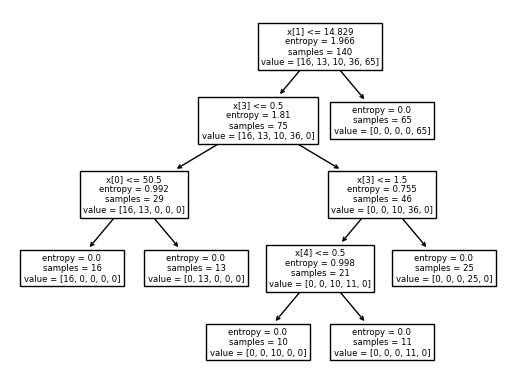

In [27]:
from sklearn.tree import plot_tree
plot_tree(clf)
plt.show()